In [2]:
import pandas as pd

df_pm = pd.read_csv('~/pm_Jan.csv')
df_pm = df_pm.drop_duplicates(subset=['Date','HomeTeam'])

df_probs = pd.read_csv('~/probs_Jan.csv')
df_probs = df_probs.drop_duplicates(subset=['Date','HomeTeam'])

df_rf_lr = pd.read_csv('~/RF_LR_Jan.csv')
df_rf_lr['RFSpread'] = df_rf_lr['RFHome']  - df_rf_lr['RFAway']
df_rf_lr['LRSpread'] = df_rf_lr['LRHome']  - df_rf_lr['LRAway']
df_rf_lr = df_rf_lr.drop_duplicates(subset=['Date','HomeTeam'])

# b_df_rf_lr = pd.read_csv('~/basic_RF_LR_Jan.csv')
# b_df_rf_lr['RFSpread_BASIC'] = b_df_rf_lr['RFHome']  - b_df_rf_lr['RFAway']
# b_df_rf_lr['LRSpread_BASIC'] = b_df_rf_lr['LRHome']  - b_df_rf_lr['LRAway']
# b_df_rf_lr = b_df_rf_lr.drop_duplicates(subset=['Date','HomeTeam'])

print('df_rf_lr',df_rf_lr['Date'].max())
print('df_pm',df_pm['Date'].max())
print('df_probs',df_probs['Date'].max())
# print('b_df_rf_lr',b_df_rf_lr['Date'].max())


df_actual_results = pd.read_excel('files/algo_picks.xlsx' ,  sheet_name  = 'raw_results')
df_actual_results['HomeTeam']  = df_actual_results['Game'].apply(lambda x: str(x).split(' ')[0])
df_actual_results['AwayTeam']  = df_actual_results['Game'].apply(lambda x: str(x).split(' ')[2])
df_actual_results['Date'] = pd.to_datetime(df_actual_results['Date'])
df_actual_results.dropna(inplace=True)
df_actual_results['ActualSpread'] = df_actual_results['Result'].apply(lambda x: int(str(x).split('-')[0]) - int(str(x).split('-')[1]))
df_actual_results['BeatTheSpread'] = ((df_actual_results['Spread'] +  df_actual_results['ActualSpread'])>0).astype(int)



df_rf_lr 2020-02-12
df_pm 2020-02-12
df_probs 2020-02-12


In [6]:
df = df_pm.merge(df_probs , how='left' , left_on =['Date','HomeTeam','AwayTeam'], right_on =['Date','HomeTeam','AwayTeam']).\
    merge(df_rf_lr , how='inner' , left_on =['Date','HomeTeam','AwayTeam'], right_on =['Date','HomeTeam','AwayTeam'])
#     merge(b_df_rf_lr , how='inner' , left_on =['Date','HomeTeam','AwayTeam'], right_on =['Date','HomeTeam','AwayTeam'])



# df = df[['Date','HomeTeam','AwayTeam','Probability','OutcomePM','RFSpread','LRSpread','RFSpread_BASIC','LRSpread_BASIC']]
df = df[['Date','HomeTeam','AwayTeam','Probability','OutcomePM','RFSpread','LRSpread']]
df['Date'] = pd.to_datetime(df['Date'])


df = df_actual_results.merge(df , how='inner' , left_on =['Date','HomeTeam','AwayTeam'], right_on =['Date','HomeTeam','AwayTeam'])

df['BeatTheSpread_PM'] = ((df['Spread'] +  df['OutcomePM'])>0).astype(int)
df['BeatTheSpread_RF'] = ((df['Spread'] +  df['RFSpread'])>0).astype(int)
df['BeatTheSpread_LR'] = ((df['Spread'] +  df['LRSpread'])>0).astype(int)
# df['BeatTheSpread_LR_BASIC'] = ((df['Spread'] +  df['LRSpread_BASIC'])>0).astype(int)
# df['BeatTheSpread_RF_BASIC'] = ((df['Spread'] +  df['RFSpread_BASIC'])>0).astype(int)

df['ProbabilityCorrect'] = ((df['ActualSpread']>0) &(df['Probability']>0.5) )| ((df['ActualSpread']<0) &(df['Probability']<0.5) )
df['PMCorrect'] = df['BeatTheSpread'] == df['BeatTheSpread_PM']
df['RFCorrect'] = df['BeatTheSpread'] == df['BeatTheSpread_RF']
df['LRCorrect'] = df['BeatTheSpread'] == df['BeatTheSpread_LR']
# df['LRCorrect_BASIC'] = df['BeatTheSpread'] == df['BeatTheSpread_LR_BASIC']
# df['RFCorrect_BASIC'] = df['BeatTheSpread'] == df['BeatTheSpread_RF_BASIC']

df['Date'].max()
# df[['LRCorrect_BASIC','RFCorrect_BASIC']].corr()

Timestamp('2020-02-12 00:00:00')

In [7]:
# probability accuracy score
res = len(df[((df['ActualSpread']>0) &(df['Probability']>0.5) )| ((df['ActualSpread']<0) &(df['Probability']<0.5) )])/ len(df)
print('Probability',res )

# accuracy score - PM
res = len(df[df['BeatTheSpread'] == df['BeatTheSpread_PM']]) / len(df)
print('PM',res )

# accuracy score - RF
res = len(df[df['BeatTheSpread'] == df['BeatTheSpread_RF']]) / len(df)
print('RF',res )

# accuracy score - LR
res = len(df[df['BeatTheSpread'] == df['BeatTheSpread_LR']]) / len(df)
print('LR',res )

# # accuracy score - RF
# res = len(df[df['BeatTheSpread'] == df['BeatTheSpread_RF_BASIC']]) / len(df)
# print('RF',res )

# # accuracy score - LR
# res = len(df[df['BeatTheSpread'] == df['BeatTheSpread_LR_BASIC']]) / len(df)
# print('LR',res )


Probability 0.5955555555555555
PM 0.5155555555555555
RF 0.5911111111111111
LR 0.56


In [26]:
homes_sum= df.groupby('HomeTeam').sum()[['ProbabilityCorrect','PMCorrect','RFCorrect','LRCorrect']]
aways_sum = df.groupby('AwayTeam').sum()[['ProbabilityCorrect','PMCorrect','RFCorrect','LRCorrect']]
homes_cnt= df.groupby('HomeTeam').count()[['ProbabilityCorrect','PMCorrect','RFCorrect','LRCorrect']]
aways_cnt = df.groupby('AwayTeam').count()[['ProbabilityCorrect','PMCorrect','RFCorrect','LRCorrect']]


lsit_of_games = [
['BOS','LAC'],
['NOP','OKC'],
]


for game in lsit_of_games:
    
    print(game, "{0:.0%}".format((homes_sum.ix[game[0]]['RFCorrect'] +  aways_sum.ix[game[1]]['RFCorrect']) /\
            (homes_cnt.ix[game[0]]['RFCorrect'] +  aways_cnt.ix[game[1]]['RFCorrect'])))



['BOS', 'LAC'] 62%
['NOP', 'OKC'] 80%


C:\Users\212778050\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app
C:\Users\212778050\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  app.launch_new_instance()


In [20]:
probs_list =[]
pm_list    =[]
rf_list    =[]
lr_list    =[]
rf_list_basic    =[]
lr_list_basic    =[]

df = df.sort_values('Date')
for ix,row in df.iterrows():
    max_date  = row['Date']
    subset_df = df[df['Date']<max_date]
    homes_sum = subset_df.groupby('HomeTeam').sum()[['ProbabilityCorrect','PMCorrect','RFCorrect','LRCorrect','RFCorrect_BASIC','LRCorrect_BASIC']]
    aways_sum = subset_df.groupby('AwayTeam').sum()[['ProbabilityCorrect','PMCorrect','RFCorrect','LRCorrect','RFCorrect_BASIC','LRCorrect_BASIC']]
    homes_cnt = subset_df.groupby('HomeTeam').count()[['ProbabilityCorrect','PMCorrect','RFCorrect','LRCorrect','RFCorrect_BASIC','LRCorrect_BASIC']]
    aways_cnt = subset_df.groupby('AwayTeam').count()[['ProbabilityCorrect','PMCorrect','RFCorrect','LRCorrect','RFCorrect_BASIC','LRCorrect_BASIC']]
    HomeTeam =  row['HomeTeam']   
    AwayTeam =  row['AwayTeam']   
    
    if ((HomeTeam in homes_sum.index) &\
         (HomeTeam in homes_cnt.index) &\
         (AwayTeam in aways_sum.index) &\
         (AwayTeam in aways_cnt.index) ):
        conf_probs = (homes_sum.ix[HomeTeam]['ProbabilityCorrect'] +  aways_sum.ix[AwayTeam]['ProbabilityCorrect']) /\
                (homes_cnt.ix[HomeTeam]['ProbabilityCorrect'] +  aways_cnt.ix[AwayTeam]['ProbabilityCorrect'])
        conf_pm = (homes_sum.ix[HomeTeam]['PMCorrect'] +  aways_sum.ix[AwayTeam]['PMCorrect']) /\
                (homes_cnt.ix[HomeTeam]['PMCorrect'] +  aways_cnt.ix[AwayTeam]['PMCorrect'])
        conf_rf = (homes_sum.ix[HomeTeam]['RFCorrect'] +  aways_sum.ix[AwayTeam]['RFCorrect']) /\
                (homes_cnt.ix[HomeTeam]['RFCorrect'] +  aways_cnt.ix[AwayTeam]['RFCorrect'])
        conf_lr = (homes_sum.ix[HomeTeam]['LRCorrect'] +  aways_sum.ix[AwayTeam]['LRCorrect']) /\
                (homes_cnt.ix[HomeTeam]['LRCorrect'] +  aways_cnt.ix[AwayTeam]['LRCorrect'])
        conf_rf_basic = (homes_sum.ix[HomeTeam]['RFCorrect_BASIC'] +  aways_sum.ix[AwayTeam]['RFCorrect_BASIC']) /\
                (homes_cnt.ix[HomeTeam]['RFCorrect_BASIC'] +  aways_cnt.ix[AwayTeam]['RFCorrect_BASIC'])
        conf_lr_basic = (homes_sum.ix[HomeTeam]['LRCorrect_BASIC'] +  aways_sum.ix[AwayTeam]['LRCorrect_BASIC']) /\
                (homes_cnt.ix[HomeTeam]['LRCorrect_BASIC'] +  aways_cnt.ix[AwayTeam]['LRCorrect_BASIC'])


        if conf_probs>0.4:
            probs_list.append([max_date,conf_probs,row['ProbabilityCorrect']])
        if conf_pm>0.4:
            pm_list.append([max_date,conf_pm,row['PMCorrect']])
        if conf_rf>0.4:
            rf_list.append([max_date,conf_rf,row['RFCorrect']])
        if conf_lr>0.4:
            lr_list.append([max_date,conf_lr,row['LRCorrect']])
        if conf_rf_basic>0.4:
            rf_list_basic.append([max_date,conf_rf_basic,row['RFCorrect_BASIC']])
        if conf_lr_basic>0.4:
            lr_list_basic.append([max_date,conf_lr_basic,row['LRCorrect_BASIC']])

C:\Users\212778050\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:23: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Users\212778050\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:24: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Users\212778050\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:25: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Users\212778050\AppData\Loca

0.6127898245545305
0.507528409090909
0.6265219155844155
0.5925170068027211
0.5787830687830688
0.5030612244897958


,probs,pm,rf,lr,rf_basic,lr_basic
Date,,,,,,
2020-01-11,6.000000,12.000000,12.000000,12.000000,12.000000,NaN
2020-01-12,10.800000,10.800000,16.200000,12.000000,16.200000,NaN
2020-01-13,13.885714,3.240000,20.828571,12.960000,4.860000,9.000000
2020-01-15,15.621429,2.332800,14.059286,13.996800,4.374000,10.800000
2020-01-16,21.088929,2.099520,18.980036,13.996800,5.248800,12.960000
2020-01-17,30.368057,1.259712,22.776043,8.398080,6.298560,5.832000
2020-01-18,32.797502,1.587237,32.797502,13.604890,7.558272,4.498971
2020-01-20,45.411925,2.285621,48.301775,16.325868,9.069926,6.073611
2020-01-22,45.411925,2.571324,52.165917,9.795521,9.069926,2.186500


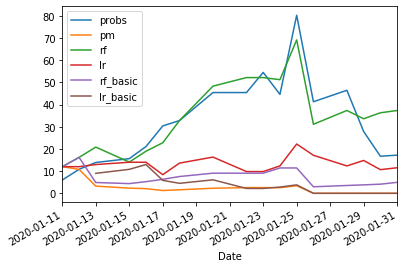

In [23]:

def calc_rev(list_of_res):
    mean_per_day = pd.DataFrame(list_of_res, columns=['Date','conf_level','isSuccess']).groupby('Date').mean()
    count_per_day = pd.DataFrame(list_of_res, columns=['Date','conf_level','isSuccess']).groupby('Date').size()
    insuficient = count_per_day[count_per_day<=2].index
    mean_per_day=mean_per_day[~mean_per_day.index.isin(insuficient)]
    mean_per_day['rev'] = mean_per_day['isSuccess']*1.8
    print(mean_per_day.mean()['isSuccess'])
    return(((mean_per_day['isSuccess']*1.8).cumprod() *10) )


import matplotlib.pyplot as plt    
probs = calc_rev(probs_list)
pm = calc_rev(pm_list)
rf = calc_rev(rf_list)
lr = calc_rev(lr_list)
rf_basic = calc_rev(rf_list_basic)
lr_basic = calc_rev(lr_list_basic)

success = pd.DataFrame([probs,pm,rf,lr,rf_basic,lr_basic]).T
success.columns = ['probs','pm','rf','lr','rf_basic','lr_basic']
success = success.ffill()
success.plot()

success

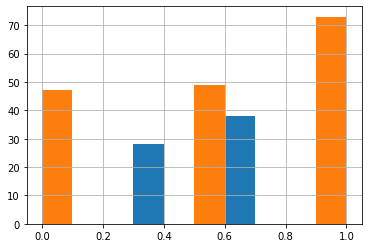

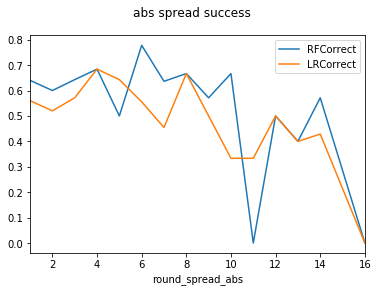

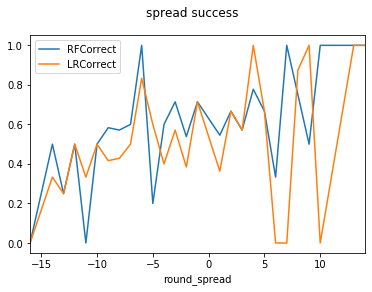

In [24]:
import numpy as np

df['avg'] = df[['BeatTheSpread_PM','BeatTheSpread_RF','BeatTheSpread_LR']].mean(axis=1)
df['sum'] = df[['BeatTheSpread_PM','BeatTheSpread_RF','BeatTheSpread_LR']].sum(axis=1)
df['avg_correct'] = df[['PMCorrect','RFCorrect','LRCorrect']].mean(axis=1)
df['avg_correct'].hist()
df['spread_in_small_interval'] = np.abs(df['Spread'])<3
df['round_spread_abs'] = np.abs(df['Spread']).astype(int)
df['round_spread'] = df['Spread'].astype(int)

df['avg'] = df[['BeatTheSpread_RF','BeatTheSpread_LR']].mean(axis=1)
df['sum'] = df[['BeatTheSpread_RF','BeatTheSpread_LR']].sum(axis=1)
df['avg_correct'] = df[['RFCorrect','LRCorrect']].mean(axis=1)
df['avg_correct'].hist()
plt.show()

import numpy as np

df[df['BeatTheSpread_RF']==df['BeatTheSpread_LR']].mean()['RFCorrect']
df[df['BeatTheSpread_RF']!=df['BeatTheSpread_LR']].mean()['RFCorrect']
df[df['BeatTheSpread_RF']==df['BeatTheSpread_LR']].groupby(['BeatTheSpread_LR','spread_in_small_interval']).mean()[['RFCorrect']]
df[df['BeatTheSpread_RF']!=df['BeatTheSpread_LR']].groupby(['BeatTheSpread_LR','spread_in_small_interval']).mean()[['RFCorrect']]

df.groupby('round_spread_abs').mean()[['RFCorrect','LRCorrect']].plot()
plt.suptitle('abs spread success')
plt.show()

df.groupby('round_spread').mean()[['RFCorrect','LRCorrect']].plot()
plt.suptitle('spread success')
plt.show()
# Rules:
# A. 
# 	Home beats spread 
# 	spread > 3  
# 	RF != LR
# B. 
# 	Away beats interval
# 	spread < 3  
# 	RF != LR
# C.
# 	Away beats interval
# 	spread < 3  
# 	RF = LR
# C.
# 	Home beats interval
# 	spread > 3  
# 	RF = LR

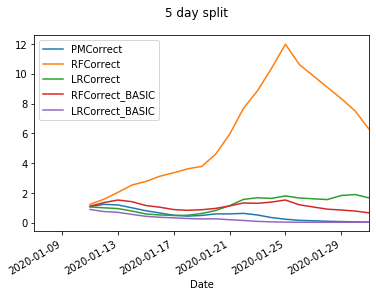

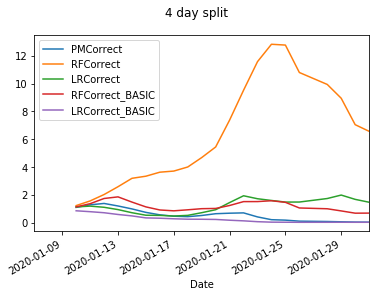

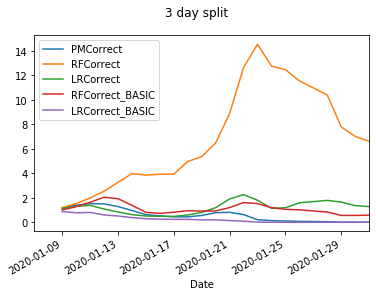

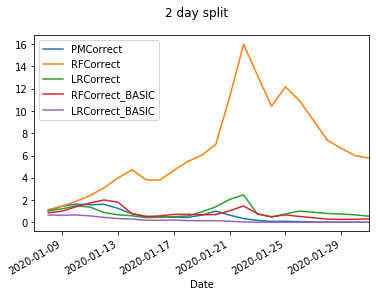

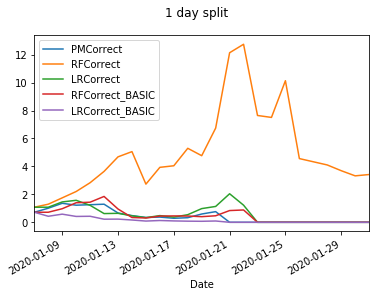

In [26]:
# row = df.ix[188]

df[(df['Date']<row['Date'])]

(df.groupby('Date').mean()[['PMCorrect','RFCorrect','LRCorrect','RFCorrect_BASIC','LRCorrect_BASIC']].rolling(5).mean()*1.8).cumprod().plot()
plt.suptitle('5 day split')
plt.show()
(df.groupby('Date').mean()[['PMCorrect','RFCorrect','LRCorrect','RFCorrect_BASIC','LRCorrect_BASIC']].rolling(4).mean()*1.8).cumprod().plot()
plt.suptitle('4 day split')
plt.show()
(df.groupby('Date').mean()[['PMCorrect','RFCorrect','LRCorrect','RFCorrect_BASIC','LRCorrect_BASIC']].rolling(3).mean()*1.8).cumprod().plot()
plt.suptitle('3 day split')
plt.show()
(df.groupby('Date').mean()[['PMCorrect','RFCorrect','LRCorrect','RFCorrect_BASIC','LRCorrect_BASIC']].rolling(2).mean()*1.8).cumprod().plot()
plt.suptitle('2 day split')
plt.show()
(df.groupby('Date').mean()[['PMCorrect','RFCorrect','LRCorrect','RFCorrect_BASIC','LRCorrect_BASIC']].rolling(1).mean()*1.8).cumprod().plot()
plt.suptitle('1 day split')
plt.show()